In [1]:
import os
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture
pd.options.display.max_columns=36
import matplotlib.cm as cm
import klib
import plotly.express as px

In [13]:
df = pd.read_csv('../data/Books_final(cleaned).csv')

In [14]:
df

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,['Αυτοβοήθεια'],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,['Ισπανικά'],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,['Φωτογραφία'],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,['Χόμπι'],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"['Φιλοσοφία', 'Κοινωνιολογία', 'Θρησκεία']",9789604304264,208.0,Χαρτόδετο
...,...,...,...,...,...,...,...,...,...,...,...
33017,Φορολογικός οδηγός ναυτιλιακών…,75.00,0.11,66.75,Ηλίας Αλιφραγκής,https://www.captainbook.gr/book/forologikos-od...,2020,['Νομική'],9786185414474,635.0,Χαρτόδετο
33018,Της ίριδας το πείσμα,8.89,0.11,7.91,Γιάννης Γιαννακόπουλος,https://www.captainbook.gr/book/tis-iridas-to-...,2020,['Πεζογραφία'],9789606440342,80.0,Χαρτόδετο
33019,Ταξιδεύοντας σε όλο τον κόσμο με…,12.72,0.11,11.32,Helena Haraštová,https://www.captainbook.gr/book/taksideuontas-...,2020,"['Εκπαίδευση', 'Παιδαγωγική']",9789606440168,34.0,Σκληρόδετο
33020,120 Σατιρικοί χάρτες ιστορικές &…,90.00,0.10,81.00,Παναγιώτης Σουκάκος,https://www.captainbook.gr/book/120-satirikoi-...,2020,['Πεζογραφία'],9786185438098,448.0,Σκληρόδετο


In [15]:
df_new = df.drop(['Link','ISBN','Author'],1)

In [16]:
df_new.set_index('Title', inplace=True)

In [17]:
attributes = pd.get_dummies(df_new)

In [18]:
attributes.shape

(33022, 129)

In [19]:
ss= MinMaxScaler()

In [20]:
attributes = ss.fit_transform(attributes)

In [21]:
attributes

array([[0.04261796, 0.42622951, 0.035309  , ..., 0.        , 1.        ,
        0.        ],
       [0.07990868, 0.18032787, 0.08053049, ..., 0.        , 0.        ,
        0.        ],
       [0.04109589, 0.16393443, 0.04224774, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03415525, 0.18032787, 0.03479628, ..., 0.        , 0.        ,
        0.        ],
       [0.26940639, 0.16393443, 0.27296965, ..., 0.        , 0.        ,
        0.        ],
       [0.08371385, 0.18032787, 0.08432458, ..., 0.        , 1.        ,
        0.        ]])

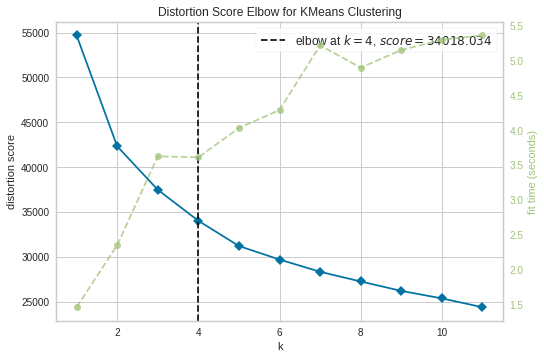

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(attributes)        # Fit the data to the visualizer
visualizer.show()                 # Finalize and render the figure
None

#### _Elbow method in our original dataset yields the result k=4 clusters_

In [25]:
primar = attributes

In [26]:
k_rng = list(range(4,12))
for n_clusters in k_rng:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(primar)

    silhouette_avg = silhouette_score(primar, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.20809894002821616
For n_clusters = 5 The average silhouette_score is : 0.21603929125204235
For n_clusters = 6 The average silhouette_score is : 0.22934220668275976
For n_clusters = 7 The average silhouette_score is : 0.2410429474214062
For n_clusters = 8 The average silhouette_score is : 0.2607118425717872
For n_clusters = 9 The average silhouette_score is : 0.27562573342367586
For n_clusters = 10 The average silhouette_score is : 0.29035488683954486
For n_clusters = 11 The average silhouette_score is : 0.2961891348883491


#### _Silhouette scores overall are really low_

In [29]:
kmean = KMeans(n_clusters=4)
labels = kmean.fit_predict(primar)

In [27]:
pca = PCA()
Xpca = pca.fit_transform(primar)

In [31]:
Xpca = pd.DataFrame(Xpca)

In [28]:
variance = pca.explained_variance_ratio_

In [32]:
silouettes = []

for ix, cum_var in enumerate(variance.cumsum()):

    Xpost_pca = Xpca.iloc[:, [*range(0,ix+1)]]
    silhouette = metrics.silhouette_score(Xpost_pca, labels)
    print(ix, cum_var, silhouette)
    silouettes.append(silhouette)
    if ix>1 and silhouette < silouettes[ix-1]:
        print('Interrupted because silouette decreased')
        break

0 0.2496142316096393 0.8867500147188297
1 0.3863016027061633 0.657782567941803
2 0.4586024205751875 0.43956468295960394
Interrupted because silouette decreased


## Dimensionality reduction to 2 components. Creating a visualisation for k=5,6,7 
---

In [19]:
pca = PCA(n_components=2)
attributes = pca.fit_transform(primar)

For n_clusters = 5 The average silhouette_score is : 0.8402728288106973
For n_clusters = 6 The average silhouette_score is : 0.8767611296258738
For n_clusters = 7 The average silhouette_score is : 0.7741663747073885


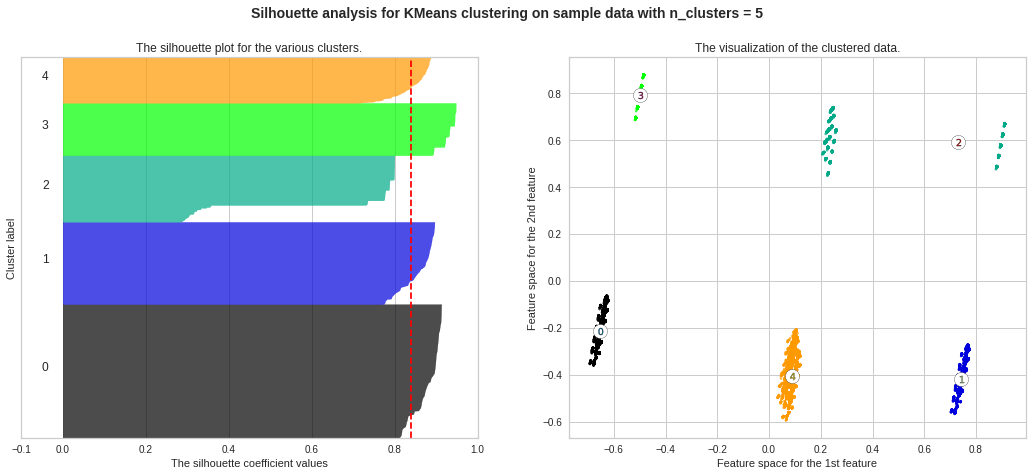

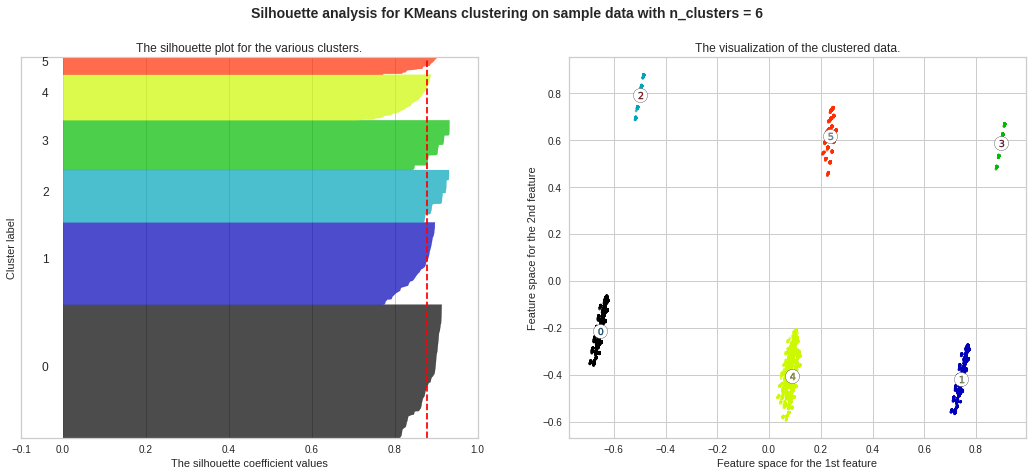

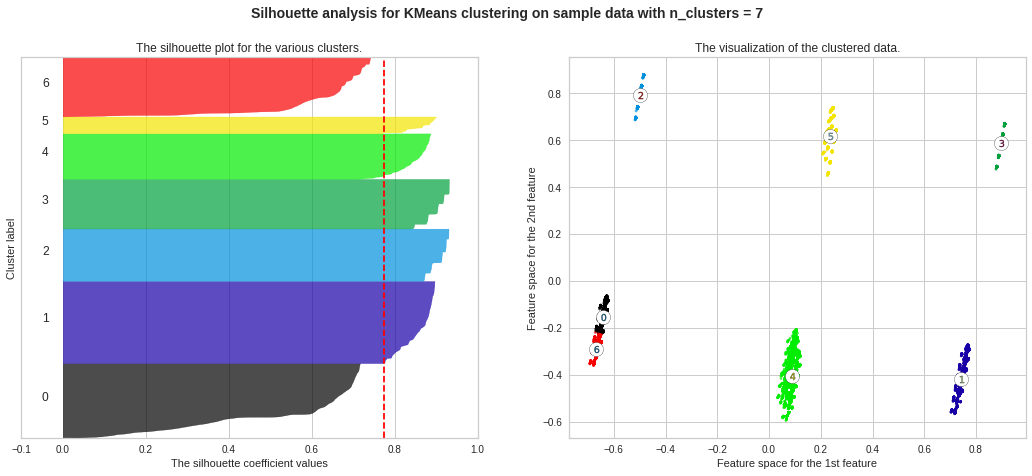

In [20]:
k_rng = [5,6,7]

for n_clusters in k_rng:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(attributes) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(attributes)

    silhouette_avg = silhouette_score(attributes, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(attributes, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(attributes[:, 0], attributes[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [36]:
pca.explained_variance_ratio_.sum()

0.38630160270616043

#### _Sadly only 38% of the variance is covered_

## Now for k=6 clusters I will reduce my dimentionality into 3 dimensions in order to visualise clusters in 3d
---

In [35]:
kmean = KMeans(n_clusters=6)
labels = kmean.fit_predict(primar)

In [14]:
pca2 = PCA(n_components=3)
attributes1 = pca2.fit_transform(primar)

In [15]:
pca2.explained_variance_ratio_.sum()

0.4586024205727345

#### _46% of the variance is covered_

In [16]:
d3 = pd.DataFrame(attributes1)

d3.columns = ['p1','p2','p3']

d3['clusters'] = labels

d3.head()

In [20]:
# fig = px.scatter_3d(d3, x=0 , y=1, z=2, color='clusters')
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.show()

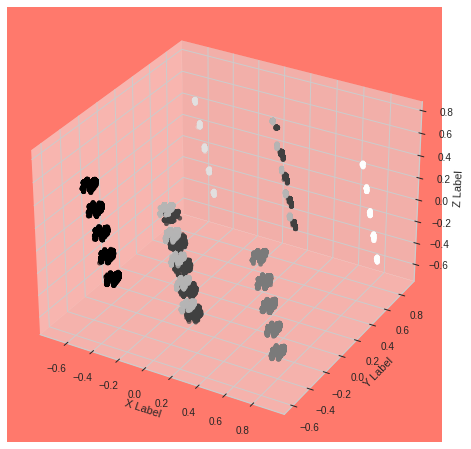

In [21]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')

ax.scatter(d3.iloc[:,0], d3.iloc[:,1], d3.iloc[:,2], c=d3['clusters'])

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

---
### <font color="red">Overall the clustering process did not bear fruits
---